## 2-3 Processing SCIENCE data

/Users/yhjo/Desktop/AstronomicalDataProcessing/Exercise/Ex2/M67/Filter
MasterBias
shape :  (800, 800)
mean :  302.56463387950026
stdev :  3.5961122201111477

B#639, SkyFlat
shape :  (800, 800)
mean :  0.9904299013662441
stdev :  0.028325106591563134


V#641, SkyFlat
shape :  (800, 800)
mean :  1.0785422346434639
stdev :  0.0325591385596299

V#641, LampFlat
shape :  (800, 800)
mean :  1.0145923974476787
stdev :  0.028786720248192843

R#642, SkyFlat
shape :  (800, 800)
mean :  1.0288232770228036
stdev :  0.02902799131058705

R#642, LampFlat
shape :  (800, 800)
mean :  1.0116499829563592
stdev :  0.029869613693937834



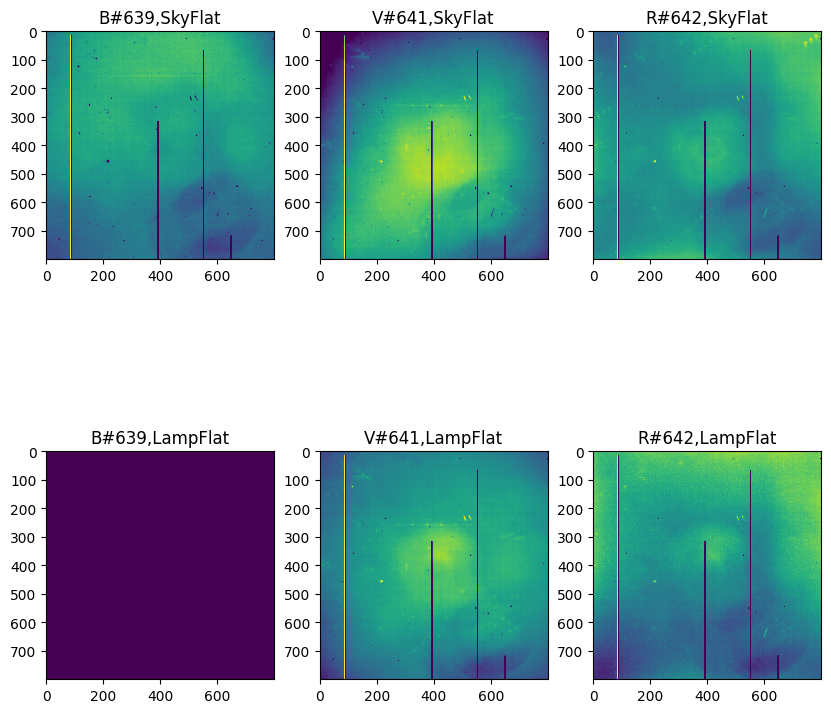

In [53]:
import os
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt

dirFilter = '/Users/yhjo/Desktop/AstronomicalDataProcessing/Exercise/Ex2/M67/Filter/' 
os.chdir(dirFilter)
print(os.getcwd())
# dirFilter = 'M67/Filter/'

### for Master bias and Master dark
os.chdir('../BIAS/')
dataB, headerB = fits.getdata('combined_bias.fit', header = True)

os.chdir('../DARK/')
dataD, headerD = fits.getdata('combined_dark.fit', header = True)

cropDataB = dataB[100:900,100:900]
cropDataD = dataD[100:900,100:900]

master = cropDataB + cropDataD
print('MasterBias')
print('shape : ', master.shape)
print('mean : ', np.mean(master))
print('stdev : ', np.std(master))
print()

os.chdir('../Filter/')
# filters = ['B#639', 'U#640', 'V#641', 'R#642']
filters = ['B#639', 'V#641', 'R#642']
flatType = ['SkyFlat', 'LampFlat']

flatData = {}
flatHeader = {}

fig, axs = plt.subplots(2, 3, figsize=(10, 10))

for i in range(len(filters)):
    filter = filters[i]
    for j in range(len(flatType)):
        type = flatType[j]
        os.chdir(filter+'/'+type+'/')
        path = dirFilter+filter+'/'+type+'/'
        fitsName = 'combined_'+filter+type+'.fit'
        if os.path.exists(fitsName):
            flatData[(filter,type)], flatHeader[(filter,type)]= fits.getdata(fitsName, header = True)
            rawData = flatData[(filter,type)][100:900,100:900]
            data = (rawData - master)/40000
            print(filter+', '+type)
            print('shape : ', data.shape)
            print('mean : ', np.mean(data))
            print('stdev : ', np.std(data))
            print()
        else:
            data = [ [0]*800 for i in range(800) ]
            print()
        axs[j, i].set_title(filter+','+type)
        axs[j, i].imshow(data, vmin = np.mean(data) - np.std(data), vmax = np.mean(data) + np.std(data))
        os.chdir('../../')

### flat region for V Sky
data[100:200][300:400]  
data[350:450][600:700]  

/Users/yhjo/Desktop/AstronomicalDataProcessing/Exercise/Ex2/M67/Filter
shape :  (100, 100)
mean :  1.079610139313932
stdev :  0.00670613007070906



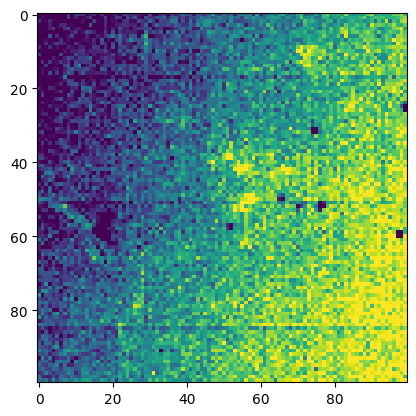

In [24]:
import os
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt

dirFilter = '/Users/yhjo/Desktop/AstronomicalDataProcessing/Exercise/Ex2/M67/Filter/' 
os.chdir(dirFilter)
print(os.getcwd())
# dirFilter = 'M67/Filter/'

### for Master bias and Master dark
os.chdir('../BIAS/')
dataB, headerB = fits.getdata('combined_bias.fit', header = True)

os.chdir('../DARK/')
dataD, headerD = fits.getdata('combined_dark.fit', header = True)

region = [300,400,300,400]
# region = [300,400,100,200]
# region = [350,450,600,700]
# region = [600,700,350,450]
region = [400,500,200,300]
# region = [150,250,200,300]

regionDataB = dataB[region[0]:region[1],region[2]:region[3]]
regionDataD = dataD[region[0]:region[1],region[2]:region[3]]

master = regionDataB + regionDataD

os.chdir('../Filter/')
# filters = ['B#639', 'U#640', 'V#641', 'R#642']
filters = ['B#639', 'V#641', 'R#642']
flatType = ['SkyFlat', 'LampFlat']

os.chdir('V#641/SkyFlat/')
path = dirFilter+filter+'/'+type+'/'
    # if os.path.exists(fitsName):
vSkyFlatFits= fits.getdata('combined_V#641SkyFlat.fit', header = True)
rawData = vSkyFlatFits[0][region[0]:region[1],region[2]:region[3]]
data = (rawData - master)/40000
print('shape : ', data.shape)
print('mean : ', np.mean(data))
print('stdev : ', np.std(data))
print()
plt.imshow(data, vmin = np.mean(data) - np.std(data), vmax = np.mean(data) + np.std(data))
os.chdir('../../')


> The error(std) has reduced
* From
    * shape :  (800, 800)
    * mean :  1.0785422346434639
    * stdev :  0.0325591385596299

* To
    * shape :  (100, 100)
    * mean :  1.079610139313932
    * stdev :  0.00670613007070906

## SCIENCE image procssing
* check header to choose V filter images first  
SCIENCE: `EFOSC.2000-12-30T07:59:36.806.fits`  
CALIB:`EFOSC.2001-01-03T08:55:18.187.fits`

plot :  /Users/yhjo/Desktop/AstronomicalDataProcessing/Exercise/Ex2/M67/ProcessSCIENCE
B#639   SkyFlat
mean :  276.0217603726594
stdev :  654.3211529947338

plot :  /Users/yhjo/Desktop/AstronomicalDataProcessing/Exercise/Ex2/M67/ProcessSCIENCE
B#639   LampFlat
mean :  0.0
stdev :  0.0

plot :  /Users/yhjo/Desktop/AstronomicalDataProcessing/Exercise/Ex2/M67/ProcessSCIENCE
V#641   SkyFlat
mean :  307.18679496146416
stdev :  1103.7709564631336

plot :  /Users/yhjo/Desktop/AstronomicalDataProcessing/Exercise/Ex2/M67/ProcessSCIENCE
V#641   LampFlat
mean :  317.3854087127657
stdev :  1141.9956540695928

plot :  /Users/yhjo/Desktop/AstronomicalDataProcessing/Exercise/Ex2/M67/ProcessSCIENCE
R#642   SkyFlat
mean :  386.8765217618391
stdev :  1470.3170272610178

plot :  /Users/yhjo/Desktop/AstronomicalDataProcessing/Exercise/Ex2/M67/ProcessSCIENCE
R#642   LampFlat
mean :  394.2402788500219
stdev :  1498.9311704618985



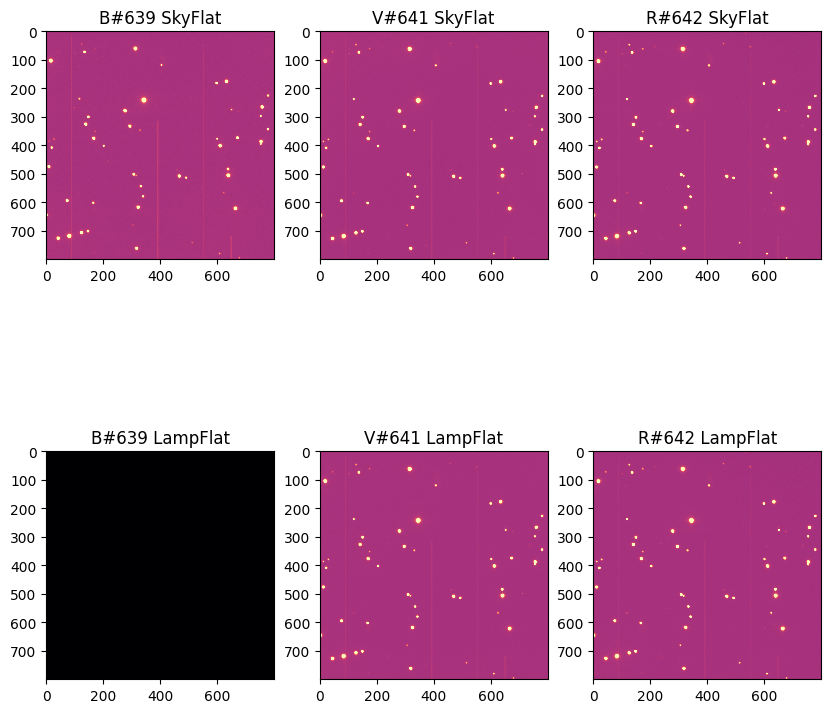

plot :  /Users/yhjo/Desktop/AstronomicalDataProcessing/Exercise/Ex2/M67/ProcessSCIENCE
B#639   SkyFlat  cropped
mean :  256.8597631337
stdev :  13.090309226751902

plot :  /Users/yhjo/Desktop/AstronomicalDataProcessing/Exercise/Ex2/M67/ProcessSCIENCE
B#639   LampFlat  cropped
mean :  0.0
stdev :  0.0

plot :  /Users/yhjo/Desktop/AstronomicalDataProcessing/Exercise/Ex2/M67/ProcessSCIENCE
V#641   SkyFlat  cropped
mean :  269.730610243
stdev :  13.48540160610256

plot :  /Users/yhjo/Desktop/AstronomicalDataProcessing/Exercise/Ex2/M67/ProcessSCIENCE
V#641   LampFlat  cropped
mean :  278.7659820106
stdev :  13.937229523695907

plot :  /Users/yhjo/Desktop/AstronomicalDataProcessing/Exercise/Ex2/M67/ProcessSCIENCE
R#642   SkyFlat  cropped
mean :  336.8880261143
stdev :  16.56211719647661

plot :  /Users/yhjo/Desktop/AstronomicalDataProcessing/Exercise/Ex2/M67/ProcessSCIENCE
R#642   LampFlat  cropped
mean :  341.89123546540003
stdev :  16.836557555067213



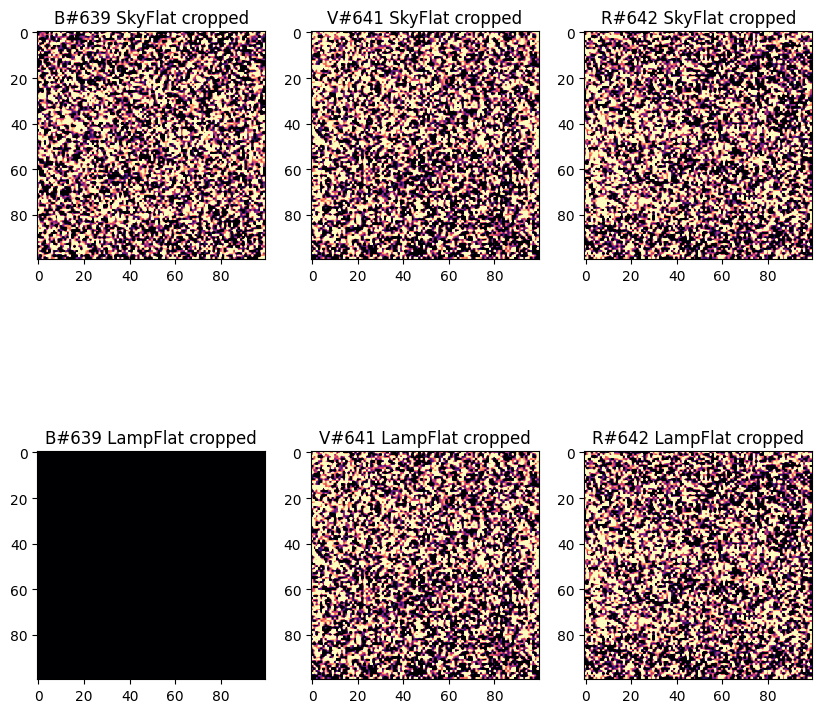

In [72]:
import os
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
import dfitspy
import ccdproc as ccdp
from pathlib import Path
from ccdproc import ImageFileCollection
import shutil
import csv

dirSCIENCE = '/Users/yhjo/Desktop/AstronomicalDataProcessing/Exercise/Ex2/M67/SCIENCE/'
dirCALIB = '/Users/yhjo/Desktop/AstronomicalDataProcessing/Exercise/Ex2/M67/CALIB/'
dirBIAS = '/Users/yhjo/Desktop/AstronomicalDataProcessing/Exercise/Ex2/M67/BIAS/'
dirDARK = '/Users/yhjo/Desktop/AstronomicalDataProcessing/Exercise/Ex2/M67/DARK/'
dirFilter = '/Users/yhjo/Desktop/AstronomicalDataProcessing/Exercise/Ex2/M67/Filter/' 
dirPS = '/Users/yhjo/Desktop/AstronomicalDataProcessing/Exercise/Ex2/M67/ProcessSCIENCE/'

sci_images = ['EFOSC.2000-12-30T07:58:50.968.fits',
                 'EFOSC.2000-12-30T07:59:36.806.fits',
                 'EFOSC.2000-12-30T08:00:22.811.fits']
cal_images = ['EFOSC.2001-01-03T08:54:27.270.fits',
                'EFOSC.2001-01-03T08:55:18.187.fits',
                'EFOSC.2001-01-03T08:56:03.899.fits']
##check Header
# sciHeader = fits.getheader('EFOSC.2000-12-30T07:58:50.968.fits')
# print(sciHeader)
# os.chdir('/Users/yhjo/Desktop/AstronomicalDataProcessing/Exercise/Ex2/')
# os.chdir(dirSCIENCE)
# keys = ['OBJECT', 'NAXIS1', 'NAXIS2', 'CDELT1', 'CDELT2', 'EXPTIME', 'HIERARCH ESO INS FILT1 NAME', 'HIERARCH ESO DET OUT2 GAIN']
# sciFiles = dfitspy.dfitsort(sci_images, keys)
# dfitspy.dfitsort_view(sciFiles)
# os.chdir('../../')
# os.chdir(dirCALIB)
# keys = ['OBJECT', 'NAXIS1', 'NAXIS2', 'CDELT1', 'CDELT2', 'EXPTIME','HIERARCH ESO INS FILT1 NAME', 'HIERARCH ESO DET OUT2 GAIN']
# calFiles = dfitspy.dfitsort(cal_images, keys)
# dfitspy.dfitsort_view(calFiles)
# os.chdir('../../')
# os.chdir('/Users/yhjo/Desktop/AstronomicalDataProcessing/Exercise/Ex2/')

########################################### copy files
os.chdir(dirCALIB)
B = {'SCIENCE':'EFOSC.2000-12-30T08:00:22.811.fits',
     'CALIB':'EFOSC.2001-01-03T08:54:27.270.fits',} 
V = {'SCIENCE' : 'EFOSC.2000-12-30T07:59:36.806.fits',
    'CALIB' : 'EFOSC.2001-01-03T08:55:18.187.fits'}
R = {'SCIENCE':'EFOSC.2000-12-30T07:58:50.968.fits',
     'CALIB':'EFOSC.2001-01-03T08:56:03.899.fits',} 
fileNameCol = [B, V, R]
# filters = ['B#639', 'U#640', 'V#641', 'R#642']
filters = ['B#639', 'V#641', 'R#642']
flatType = ['SkyFlat', 'LampFlat']

def copyCalibFiles():
    allFiles = dfitspy.get_files(['all'], dire = dirCALIB)
    for f in range(len(fileNameCol)):
        for i in range(len(allFiles)):
            if allFiles[i] == 'M67/CALIB/'+fileNameCol[f]['CALIB']:
                shutil.copy2(allFiles[i], dirPS)
                print('cal copied')
 
def copyScienceFiles():
    allFiles = dfitspy.get_files(['all'], dire = dirSCIENCE)
    for f in range(len(fileNameCol)):
        for i in range(len(allFiles)):
            if allFiles[i] == 'M67/SCIENCE/'+fileNameCol[f]['SCIENCE']:
                shutil.copy2(allFiles[i], dirPS)
                print('sci copied')
copyCalibFiles()
copyScienceFiles()

########################################### Bias & Dark
def getBias():
    previousDir = os.getcwd()
    ### for master = bias - dark
    os.chdir(dirBIAS)
    print('bias : ', os.getcwd())
    biasData = fits.getdata('combined_bias.fit', header = False)
    os.chdir('../')
    os.chdir(dirDARK)
    print('dark : ', os.getcwd())
    darkData = fits.getdata('combined_dark.fit', header = False)
    os.chdir('../')
    master = np.array(biasData[100:900,100:900], dtype = 'f') - np.array(darkData[100:900,100:900], dtype = 'f')
    os.chdir(previousDir)
    return np.array(master, dtype = 'f')
    # GAIN = 0.24
    # os.chdir(dirPS)
    # calibFitsFileV = fileNameCol[1]['CALIB']
    # calibDataV, calibHeaderV = fits.getdata(calibFitsFileV, header = True, dtype = 'f')
    # dataV = calibDataV[100:900,100:900]
    # return dataV*GAIN

########################################### Flat
def getFlat():
    master = getBias()
    previousDir = os.getcwd()
    os.chdir(dirFilter)
    print('flat : ',os.getcwd())
    flatData  = {}
    master = getBias()
    for i in range(len(filters)):
        filter = filters[i]
        for j in range(len(flatType)):
            type = flatType[j]
            os.chdir(dirFilter)
            os.chdir(filter+'/'+type+'/')
            path = dirFilter+filter+'/'+type+'/'
            fitsName = 'combined_'+filter+type+'.fit'
            if os.path.exists(fitsName):
                rawFlat = []
                flatData[(filter,type)] = fits.getdata(fitsName, header = False)
                rawFlat = flatData[(filter,type)][100:900,100:900]
                ## bias&dark subtracted and normalised
                normFlat = (rawFlat - master)/np.mean(rawFlat)
            else:
                normFlat = [[1]*800]*800
            flatData.update({(filter,type):normFlat})
            os.chdir('../../')
    os.chdir(previousDir)
    return flatData

########################################### Processing Science

def processScience():
    biasData = getBias()
    print(os.getcwd())
    for i in range(len(filters)):
        os.chdir(dirPS)
        filter = filters[i]
        rawFitsFile = fileNameCol[i]['SCIENCE'] ###0: B, 1:V, 2:R
        rawFits = fits.getdata(rawFitsFile, header = True, dtype = 'f')
        rawData = np.array(rawFits[0][100:900,100:900], dtype = 'f')
        print('PS : ',os.getcwd())
        for j in range(len(flatType)):
            type = flatType[j]
            dataPS = (rawData - biasData) / getFlat()[filter,type]
            with open(filter+type+'.processed', 'w') as file:
                for k in range(len(dataPS)):
                    for l in range(len(dataPS[0])):
                        file.write('%f,' % dataPS[k][l])
                    file.write('\n')
                print(filter+type+'.processed created.')

# processScience()

def getPSData(filter, type):
    ####### pSData = [[0]*800]*800 ### this is not working!!! Do not use this expression! This is a trap!
    pSData = [ [0]*800 for i in range(800) ]
    os.chdir(dirPS)
    fileName = filter+type+'.processed'
    if os.path.exists(fileName):
        with open(fileName, "r") as file:
            ##load data from file
            listOfLines = file.read().splitlines()   #list of strings
            for i in range(len(listOfLines)):
                line = listOfLines[i] #list of string, delimiter = ','
                listOfValues = line.split(',')
                for j in range(len(listOfValues)):
                    value = listOfValues[j]
                    if not value =='':
                        pSData[i][j] = float(value)
    return pSData
#==========================================region : [x1,x2,y1,y2]    
def getCropPSData(filter, type, region):
    ####### pSData = [[0]*800]*800 ### this is not working!!! Do not use this expression! This is a trap!
    pSData = [ [0]*100 for i in range(100) ]
    os.chdir(dirPS)
    fileName = filter+type+'.processed'
    if os.path.exists(fileName):
        with open(fileName, "r") as file:
            ##load data from file
            listOfLines = file.read().splitlines()   #list of strings
            for i in range(region[0],region[1]):
                line = listOfLines[i] #list of string, delimiter = ','
                listOfValues = line.split(',')
                for j in range(region[2],region[3]):
                    value = listOfValues[j]
                    if not value =='':
                        pSData[i-region[0]][j-region[2]] = float(value)
    return pSData

##====================================================== check the process science
fig, axs = plt.subplots(2, 3, figsize = (10, 10))
os.chdir(dirPS)
for i in range(len(filters)):
    filter = filters[i]
    for j in range(len(flatType)):
        print('plot : ', os.getcwd())
        type = flatType[j]
        data = getPSData(filter, type)
        print(filter,' ',type)
        print('mean : ', np.mean(data))
        print('stdev : ', np.std(data))
        print()
        if not data == False:
            axs[j, i].imshow(data, vmin = np.mean(data) - np.std(data)/2, vmax = np.mean(data) + np.std(data)/2, cmap ='magma')
            axs[j, i].set_title(filter+' '+type)
        else:
            print('empty?')
plt.show()
##====================================================== check an empty region
fig, axsc = plt.subplots(2, 3, figsize = (10, 10))
region = [200,300,400,500]
for i in range(len(filters)):
    filter = filters[i]
    for j in range(len(flatType)):
        print('plot : ', os.getcwd())
        type = flatType[j]
        data = getCropPSData(filter, type, region)
        print(filter,' ',type, ' cropped')
        print('mean : ', np.mean(data))
        print('stdev : ', np.std(data))
        print()
        if not data == False:
            axsc[j, i].imshow(data, vmin = np.mean(data) - np.std(data)/2, vmax = np.mean(data) + np.std(data)/2, cmap ='magma')
            axsc[j, i].set_title(filter+' '+type+' cropped')
        else:
            print('empty?')
plt.show()




## 2-4 Error Propagation
error : variance  
$$Gain = \frac{(\bar{F_1} + \bar{F_2}) - (\bar{B_1} + \bar{B_2})}{\sigma_{F_1 - F_2}^2 - \sigma_{B_1 - B_2}^2} $$  
$$RON = \frac{Gain \cdot \sigma_{B_1-B_2}}{\sqrt2}$$  
$$PS = \frac{raw - bias - dark}{flat_{normalised}}$$  
$$Var(PS) = \frac{S_{raw} + RON^2 + \sigma_{bias}^2 + PS^2\sigma_{flat}^2}{flat_{normalised}^2}$$

≡≡≡≡≡≡≡≡≡≡Gain, RON≡≡≡≡≡≡≡≡≡≡
gain:  1.2237962274642975
RON :  8.926408915992111
≡≡≡≡≡≡≡≡≡≡Bias, Dark≡≡≡≡≡≡≡≡≡≡
varMB :  1.9920194033875862
varMBcom :  2.49662608007245
darkExpTime :  1800.0036
========== B#639 ==========
SCIENCE EXPTIME :  4.9959
varD :  8.53034247657239e-05
	----- SkyFlat -----
	nFlat :  11
	mean varf :  1.8638796310985453e-06
	mean varPS :  386.64215788247793
	----- LampFlat -----
	nFlat :  1
	mean varf :  54.020033168445515
	mean varPS :  385.25317030778143

========== V#641 ==========
SCIENCE EXPTIME :  4.996
varD :  8.530683973714047e-05
	----- SkyFlat -----
	nFlat :  11
	mean varf :  1.712442898280488e-06
	mean varPS :  422.9777708591434
	----- LampFlat -----
	nFlat :  16
	mean varf :  1.2510780170766376e-06
	mean varPS :  422.93070138131054

========== R#642 ==========
SCIENCE EXPTIME :  4.996
varD :  8.530683973714047e-05
	----- SkyFlat -----
	nFlat :  11
	mean varf :  1.7947232652227948e-06
	mean varPS :  479.22347013734634
	----- LampFlat -----
	nFlat :  16


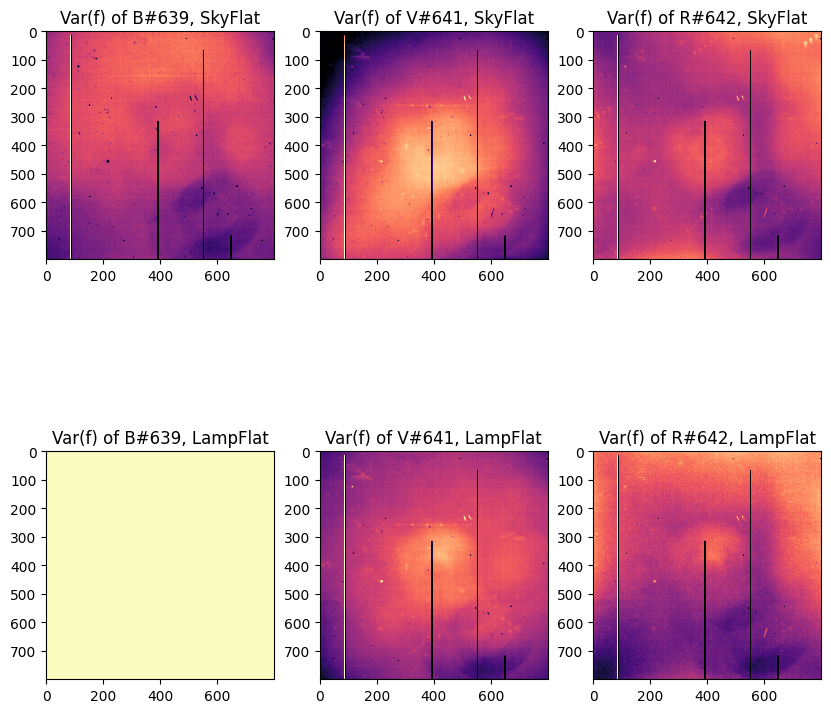

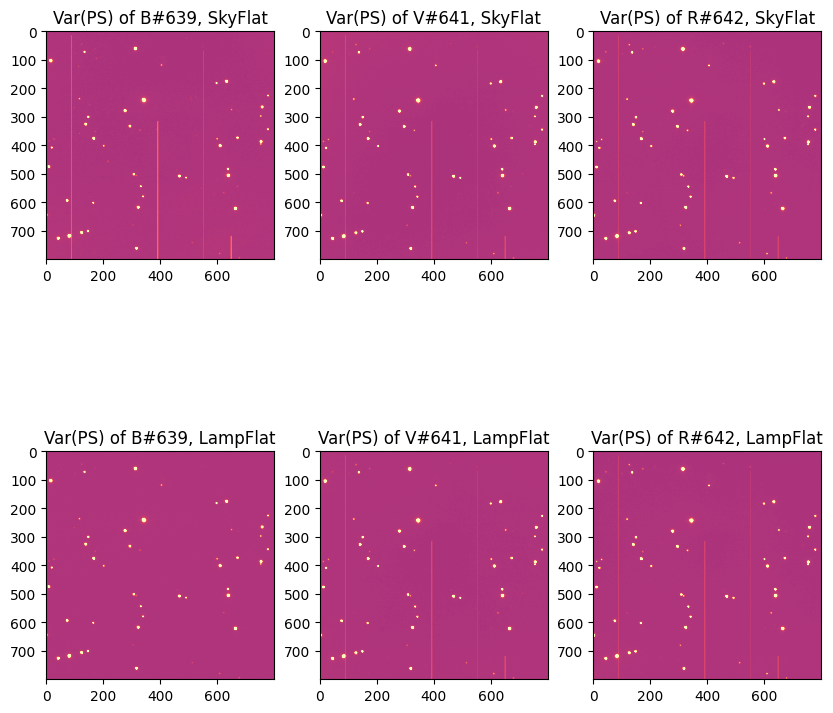

In [89]:
import os
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
import dfitspy
import ccdproc as ccdp
from pathlib import Path
from ccdproc import ImageFileCollection
import shutil

dirSCIENCE = '/Users/yhjo/Desktop/AstronomicalDataProcessing/Exercise/Ex2/M67/SCIENCE/'
dirCALIB = '/Users/yhjo/Desktop/AstronomicalDataProcessing/Exercise/Ex2/M67/CALIB/'
dirBIAS = '/Users/yhjo/Desktop/AstronomicalDataProcessing/Exercise/Ex2/M67/BIAS/'
dirDARK = '/Users/yhjo/Desktop/AstronomicalDataProcessing/Exercise/Ex2/M67/DARK/'
dirFilter = '/Users/yhjo/Desktop/AstronomicalDataProcessing/Exercise/Ex2/M67/Filter/' 
dirPS = '/Users/yhjo/Desktop/AstronomicalDataProcessing/Exercise/Ex2/M67/ProcessSCIENCE/'

B = {'SCIENCE':'EFOSC.2000-12-30T08:00:22.811.fits',
     'CALIB':'EFOSC.2001-01-03T08:54:27.270.fits',} 
V = {'SCIENCE' : 'EFOSC.2000-12-30T07:59:36.806.fits',
    'CALIB' : 'EFOSC.2001-01-03T08:55:18.187.fits'}
R = {'SCIENCE':'EFOSC.2000-12-30T07:58:50.968.fits',
     'CALIB':'EFOSC.2001-01-03T08:56:03.899.fits',} 

fileNameCol = [B, V, R]
## call : fileNameCol[i]['SCIENCE'] ###0: B, 1:V, 2:R

# filters = ['B#639', 'U#640', 'V#641', 'R#642']
filters = ['B#639', 'V#641', 'R#642']
flatType = ['SkyFlat', 'LampFlat']
########################################### Bias & Dark
def getBias():
    previousDir = os.getcwd()
    ### for master = bias - dark
    os.chdir(dirBIAS)
    # print('bias dir: ', os.getcwd())
    biasData = fits.getdata('combined_bias.fit', header = False)
    os.chdir(dirDARK)
    # print('dark dir: ', os.getcwd())
    darkData = fits.getdata('combined_dark.fit', header = False)
    master = biasData[100:900,100:900] - darkData[100:900,100:900]
    os.chdir(previousDir)
    return master
bias = getBias()

def getBiasN():
    previousDir = os.getcwd()
    os.chdir(dirBIAS)
    biasData = fits.getdata('combined_bias.fit', header = False)
    os.chdir(previousDir)
    return len(biasData)
########################################### Dark
def getDark():
    previousDir = os.getcwd()
    os.chdir(dirDARK)
    # print('dark dir: ', os.getcwd())
    darkData= fits.getdata('combined_dark.fit', header = False)
    os.chdir(previousDir)
    return darkData[100:900,100:900]
    
def getDarkExpTime():
    previousDir = os.getcwd()
    os.chdir(dirDARK)
    # print('dark dir: ', os.getcwd())
    darkHeader = fits.getheader('combined_dark.fit')
    darkExpTime = darkHeader['EXPTIME']
    # print('darkExpTime : ', darkExpTime)
    os.chdir(previousDir)
    return darkExpTime
    
dark = getDark()
darkExpTime = getDarkExpTime()
########################################### RON : greatest contributer
def getGainRONPair():
    previousDir = os.getcwd()
    os.chdir(dirCALIB)
    os.chdir('../BIAS/')
    B1whole = fits.getdata(os.listdir()[10], dtype = 'f')
    B2whole = fits.getdata(os.listdir()[11], dtype = 'f')
    os.chdir('../../')
    os.chdir(dirFilter)
    os.chdir('V#641/SkyFlat/')
    F1whole = fits.getdata(os.listdir()[0], dtype = 'f')
    F2whole = fits.getdata(os.listdir()[1], dtype = 'f')
    os.chdir('../../')
    B1 = np.array(B1whole[100:900, 100:900], dtype = 'f')
    B2 = np.array(B2whole[100:900, 100:900], dtype = 'f')
    F1 = np.array(F1whole[100:900, 100:900], dtype = 'f')
    F2 = np.array(F2whole[100:900, 100:900], dtype = 'f')
    F = np.array(F1 - F2, dtype = 'f')
    B = np.array(B1 - B2, dtype = 'f')
    
    GAIN = (( (np.mean(F1) + np.mean(F2)) - (np.mean(B1) + np.mean(B2)) ) / ( np.std(F)**2 - np.std(B)**2 ))
    RON = GAIN* np.std(B) /np.sqrt(2)
    os.chdir(previousDir)
    return (GAIN,RON)

GAIN = getGainRONPair()[0]
RON = getGainRONPair()[1]
### RON ~ 90 
########################################### Flat : dictionary of flat data  - normFlatCol[(filter,type)]
def getNormFlat(filter,type):
    previousDir = os.getcwd()
    os.chdir(dirFilter)
    os.chdir(filter+'/'+type+'/')
    path = dirFilter+filter+'/'+type+'/'
    fitsName = 'combined_'+filter+type+'.fit'
    if os.path.exists(fitsName):
        flatData = fits.getdata(fitsName, header = False)
        rawFlat = flatData[100:900,100:900]
        ## bias&dark subtracted and normalised
        normFlat = (rawFlat - bias)/np.mean(rawFlat)
    else:
        normFlat = [ [1]*800 for i in range(800) ]
        os.chdir('../../')
    os.chdir(previousDir)
    return normFlat

def getRawFlat(filter,type):
    previousDir = os.getcwd()
    os.chdir(dirFilter)
    os.chdir(filter+'/'+type+'/')
    path = dirFilter+filter+'/'+type+'/'
    fitsName = 'combined_'+filter+type+'.fit'
    if os.path.exists(fitsName):
        flatData = fits.getdata(fitsName, header = False)
        rawFlat = flatData[100:900,100:900]
    else:
        normFlat = [ [1]*800 for i in range(800) ]
        os.chdir('../../')
    os.chdir(previousDir)
    return rawFlat

def getAvgFlatFlux(filter,type):
    previousDir = os.getcwd()
    os.chdir(dirFilter)
    os.chdir(filter+'/'+type+'/')
    path = dirFilter+filter+'/'+type+'/'
    fitsName = 'combined_'+filter+type+'.fit'
    if os.path.exists(fitsName):
        flatData = fits.getdata(fitsName, header = False)
        rawFlat = flatData[100:900,100:900]
        avgFlat = np.mean(rawFlat - bias)
    else:
        avgFlat = 1
    os.chdir('../../')
    os.chdir(previousDir)
    return avgFlat

def getFlatN(filter,type):
    previousDir = os.getcwd()
    if filter == filters[i]:
        filterIndex = i
    if type == flatType[j]:
        typeIndex = j
    os.chdir(dirFilter)
    os.chdir(filter+'/'+type+'/')
    path = dirFilter+filter+'/'+type+'/'
    nFlat = len(os.listdir(path))
    if nFlat == 0:
        nFlat = 1
    os.chdir('../../')
    os.chdir(previousDir)
    return nFlat
########################################### Var Raw SCIENCE
def getRawScience(filter):
    previousDir = os.getcwd()
    os.chdir(dirSCIENCE)
    if filter == filters[i]:
        fileNameIndex = i
    fitsFileName = fileNameCol[fileNameIndex]['SCIENCE']
    uncutDataSraw,  headerSraw = fits.getdata(fitsFileName, header = True, dtype = 'f')
    dataSraw = uncutDataSraw[100:900,100:900]
    varSraw = (dataSraw - bias)*GAIN +RON**2
    os.chdir(previousDir)
    return varSraw
    
def getSciExpTime(filter):
    previousDir = os.getcwd()
    os.chdir(dirSCIENCE)
    for i in range(len(filters)):
        if filter == filters[i]:
            fileNameIndex = i
    fitsFileName = fileNameCol[fileNameIndex]['SCIENCE']
    headerSraw = fits.getheader(fitsFileName)
    os.chdir(previousDir)
    return headerSraw['EXPTIME']
########################################### ProcessSCIENCE
def getPSData(filter, type):
    previousDir = os.getcwd()
    ####### pSData = [[0]*800]*800 ### this is not working!!! Do not use this expression! This is a trap!
    pSData = [ [0]*800 for i in range(800) ]
    os.chdir(dirPS)
    fileName = filter+type+'.processed'
    if os.path.exists(fileName):
        with open(fileName, "r") as file:
            ##load data from file
            listOfLines = file.read().splitlines()   #list of strings
            for i in range(len(listOfLines)):
                line = listOfLines[i] #list of string, delimiter = ','
                listOfValues = line.split(',')
                for j in range(len(listOfValues)):
                    value = listOfValues[j]
                    if not value =='':
                        pSData[i][j] = float(value)
    os.chdir(previousDir)
    return pSData

# a tool for production of a 2D array with two 2D arrays
def linearProduct(array1, array2):
    nColumn1 = len(array1)
    nRow1 = len(array1[0])
    nColumn2 = len(array2)
    nRow2 = len(array2[0])
    pSData = [ [1]*nColumn1 for i in range(nColumn1) ]
    if (nColumn1 == nColumn2 and nRow1 == nRow2):
        for i in range(nColumn1):
            for j in range(nRow1):
                pSData[i][j] = array1[i][j] * array2[i][j]
    return pSData

########################################### Var Raw SCIENCE

#==========================================region : [x1,x2,y1,y2]    
def getCropPSData(filter, type, region):
    ####### pSData = [[0]*800]*800 ### this is not working!!! Do not use this expression! This is a trap!
    pSData = [ [0]*100 for i in range(100) ]
    os.chdir(dirPS)
    fileName = filter+type+'.processed'
    if os.path.exists(fileName):
        with open(fileName, "r") as file:
            ##load data from file
            listOfLines = file.read().splitlines()   #list of strings
            for i in range(region[0],region[1]):
                line = listOfLines[i] #list of string, delimiter = ','
                listOfValues = line.split(',')
                for j in range(region[2],region[3]):
                    value = listOfValues[j]
                    if not value =='':
                        pSData[i-region[0]][j-region[2]] = float(value)
    return pSDatas

########################################### VarSraw
### varSrawB ~ 18
### varSrawV ~ 40
### varSrawR ~ 90
########################################### Var Bias : does not depend on filter
### varMB~2.3
########################################### Var Dark : so small
## PSVarF ~ 10^-2 ~10^-3
########################################### Var Processed SCIENCE

########################################### BIAS
# CALIBfits = {'B' : 'EFOSC.2001-01-03T08:54:27.270.fits',
#              'V' : 'EFOSC.2001-01-03T08:55:18.187.fits',
#              'R' : 'EFOSC.2001-01-03T08:56:03.899.fits'}
# calibData = []
# for fitsFile in CALIBfits:
#     calibData[i] = fits.getdata(fits, dtype = 'f')
fig, axs_f = plt.subplots(2, 3, figsize=(10, 10))
fig, axs_ps = plt.subplots(2, 3, figsize=(10, 10))
print('≡≡≡≡≡≡≡≡≡≡Gain, RON≡≡≡≡≡≡≡≡≡≡')
print('gain: ', GAIN)
print('RON : ', RON)
print('≡≡≡≡≡≡≡≡≡≡Bias, Dark≡≡≡≡≡≡≡≡≡≡')
varMB = RON**2 / 40
varMBcom = RON**2 * np.sqrt(np.pi/2) / 40
print('varMB : ', varMB)
print('varMBcom : ', varMBcom)
print('darkExpTime : ', darkExpTime)
for i in range(len(filters)):
    print('==========',filters[i],'==========')
    filter = filters[i]
    varSraw = getRawScience(filter)
    sciExpTime = getSciExpTime(filter)
    print('SCIENCE EXPTIME : ', sciExpTime)
    varD = np.std(dark)**2 * (sciExpTime/darkExpTime)**2
    print('varD : ', varD)
    for j in range(len(flatType)):
        print('\t-----',flatType[j],'-----')
        type = flatType[j]
        nFlat = getFlatN(filter,type)
        print('\tnFlat : ',nFlat)
        f = getNormFlat(filter, type)
        f_F = getAvgFlatFlux(filter, type)*GAIN
        varf = (RON**2)/((f_F**2) * nFlat) + f/(nFlat*f_F)
        print('\tmean varf : ', np.mean(varf))
        axs_f[j][i].set_title('Var(f) of '+filter+', '+type)
        axs_f[j][i].imshow(varf, vmin = np.mean(varf) - np.std(varf), vmax = np.mean(varf) + np.std(varf), cmap ='magma')
        dataPS = getPSData(filter, type)
        varPS = ((varSraw + RON**2) + (varMBcom**2) + (varD**2) + (linearProduct(linearProduct(dataPS, dataPS),linearProduct(varf,varf)) )) / linearProduct(f,f)
        print('\tmean varPS : ', np.mean(varPS))
        axs_ps[j][i].set_title('Var(PS) of '+filter+', '+type)
        axs_ps[j][i].imshow(varPS, vmin = np.mean(varPS) - np.std(varPS), vmax = np.mean(varPS) + np.std(varPS), cmap ='magma')
    print()    
            

In [13]:
import os
print(os.getcwd())
# os.chdir('SCIENCE/')
print(os.getcwd())

/Users/yhjo/Desktop/AstronomicalDataProcessing/Exercise/Ex2/M67/SCIENCE
/Users/yhjo/Desktop/AstronomicalDataProcessing/Exercise/Ex2/M67/SCIENCE
